In [ ]:
#instal kaggle
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahrawr","key":"9d2791d96e144192897ab753cb7bb811"}'}

In [ ]:
#create a kaggle folder
# ! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
# ! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
# ! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           7992        151  1.0              
whisperingkahuna/footballers-with-50-international-goals-men  Footballers with 50+ International Goals [men]       3KB  2024-11-17 12:51:23           1154         25  1.0              
jacopoferretti/incomes-of-30k-usa-citizens                    Incomes of 30K USA Citizens                        468KB  2024-11-17 00:16:20            967         22  1.0              
daniellopez01/credit-risk                                     credit_risk  

In [ ]:
# !kaggle datasets download -d 'hadjerhamaidi/date-palm-data'

Dataset URL: https://www.kaggle.com/datasets/hadjerhamaidi/date-palm-data
License(s): other
 75% 32.0M/42.7M [00:00<00:00, 111MB/s] 
100% 42.7M/42.7M [00:00<00:00, 116MB/s]


In [ ]:
# import zipfile

# dataset_zip = zipfile.ZipFile('date-palm-data.zip', 'r') # Changed Zipfile to ZipFile

# dataset_zip.extractall()

# dataset_zip.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML
from tensorflow.keras.optimizers import RMSprop
import os
from tensorflow.keras.utils import load_img # Importing the load_img function from tensorflow.keras.utils
from tensorflow.keras.utils import img_to_array # this might be needed too. If not, remove it
import os
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi list untuk menyimpan file paths dan labels

In [4]:
filepaths = []
labels = []

# Daftar kelas penyakit atau kondisi yang ada di dataset

In [5]:
import os

sdir = '../data/Date Palm data'

classlist = os.listdir(sdir)

# Menyusun file paths dan label sesuai struktur dataset

In [6]:
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    if os.path.isdir(classpath):
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

In [7]:
# Membuat DataFrame dengan file paths dan labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [8]:
# Tampilkan 5 data pertama dan hitung jumlah masing-masing label
print(df.head())
print(df['labels'].value_counts())

                                           filepaths       labels
0  ../data/Date Palm data\brown spots\brownspots-...  brown spots
1  ../data/Date Palm data\brown spots\brownspots-...  brown spots
2  ../data/Date Palm data\brown spots\brownspots-...  brown spots
3  ../data/Date Palm data\brown spots\brownspots-...  brown spots
4  ../data/Date Palm data\brown spots\brownspots-...  brown spots
labels
healthy        1203
white scale     958
brown spots     470
Name: count, dtype: int64


In [9]:
# Visualisasi beberapa gambar dalam dataset
def visualize_images(df, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))
    for i in range(n_images):
        img_path = df['filepaths'].iloc[i]
        img = load_img(img_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(df['labels'].iloc[i])
        axes[i].axis('off')
    plt.show()

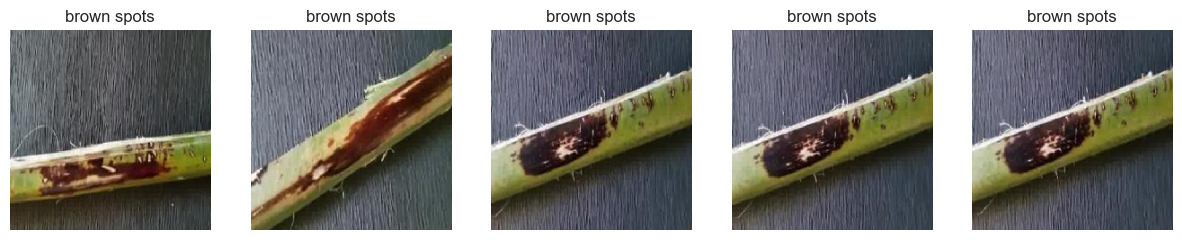

In [10]:
# Visualisasikan 5 gambar pertama
visualize_images(df, n_images=5)

In [11]:
# Mengubah gambar menjadi array numerik
def load_and_preprocess_images(df, img_size=(224, 224)):
    images = []
    for img_path in df['filepaths']:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img)
        img = img / 255.0
        images.append(img)
    return np.array(images)

In [12]:
# Menyusun data gambar
images = load_and_preprocess_images(df)

In [13]:
# Mengonversi label menjadi format numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(df['labels'])

In [14]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [15]:
# Tampilkan dimensi data setelah pemisahan
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (2104, 224, 224, 3), Test data shape: (527, 224, 224, 3)


In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [17]:
# Untuk data validasi (test), hanya rescaling yang dilakukan
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [18]:
# Memperoleh data pelatihan dan pengujian dengan augmentasi
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [19]:
# Visualisasi beberapa gambar hasil augmentasi
def visualize_augmentation(generator, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))
    for i in range(n_images):
        img_batch, _ = next(generator)
        img = img_batch[0]
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

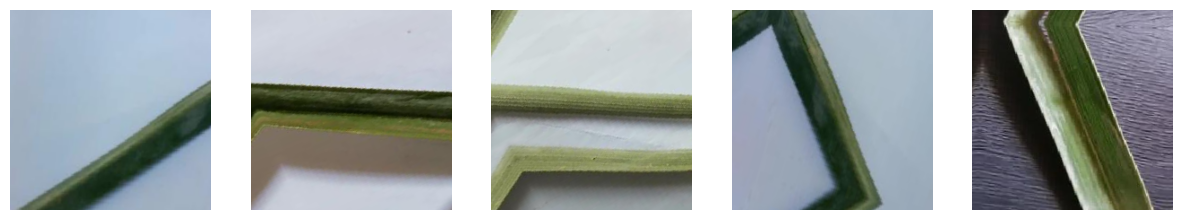

In [20]:
# Visualisasikan 5 gambar pertama hasil augmentasi
visualize_augmentation(train_generator, n_images=5)